# Gold Price VS Import Values and Export Values ##

We are interested in determing the relationship between gold price versus import values and gold price versus export values. To find out, we obtain monthly gold price from Internet, monthly import and export value for different countries from IMF data library. 

## Extract import values and Export values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf

Define functions to split values for different countries

In [2]:
# get import values for select country
def selectImportCountry(country):
    selector = import_data[['Country Name']].values == country
    temp = import_data[selector]
    temp = temp[temp['Time Period'].astype('string').str.contains('M')]
    temp['Time Period'] = temp['Time Period'].astype('string').str.replace('M','-')
    temp['Time Period'] = pd.to_datetime(temp['Time Period'])
    temp.sort_values(['Time Period'], ascending = 1)
    return temp.drop(['Indicator Code','Country Code'], axis = 1)

In [3]:
# get export vlues for select country
def selectExportCountry(country):
    selector = export_data[['Country Name']].values == country
    temp = export_data[selector]
    temp = temp[temp['Time Period'].astype('string').str.contains('M')]
    temp['Time Period'] = temp['Time Period'].astype('string').str.replace('M','-')
    temp['Time Period'] = pd.to_datetime(temp['Time Period'])
    temp.sort_values(['Time Period'], ascending = 1)
    return temp.drop(['Indicator Code','Country Code'], axis = 1)

In [4]:
# calculate the correlation between gold price and import or export values
def calCorrelation(dataFrame):
    corr = dataFrame['gold price'].corr(dataFrame['Value'])
    print corr

In [5]:
# normalized data
def normalizeDate(dataframe):
    dataframe['normalized gold price'] = \
    (dataframe['gold price']- dataframe['gold price'].mean())/(dataframe['gold price'].std()/np.sqrt(dataframe['Time Period'].size))
    dataframe['normalized value'] = \
    (dataframe['Value'] - dataframe['Value'].mean())/(dataframe['Value'].std()/np.sqrt(dataframe['Time Period'].size))                                                             

In [6]:
# calculate the correlation after normalization
def calNormCorrelation(dataFrame):
    normalCorr = dataFrame['normalized gold price'].corr(dataFrame['normalized value'])
    print normalCorr

In [7]:
# calculate the correlation after normalization
def getNormCorrelation(dataFrame):
    normalCorr = dataFrame['normalized gold price'].corr(dataFrame['normalized value'])
    return normalCorr

In [8]:
# plot time vs gold price and import or export values
def plotTimeSeriesData(dataFrame, isImport):
    dataFrame.plot(x = ['Time Period'], y = ['normalized gold price','normalized value'])
    if(isImport):
        plt.title('Gold Price VS ' + dataFrame['Country Name'][0] + ' import values')
    else:
        plt.title('Gold Price VS ' + dataFrame['Country Name'][0] + ' export values')

In [9]:
# summarize results
def summaryResult(dataFrame):
    x = dataFrame['normalized gold price']
    y = dataFrame['normalized value']
    results = smf.OLS(y,x).fit()
    print dataFrame['Country Name'][0]
    print results.summary()
    print "~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n \n \n"

Fetch date from pre-processed dataset

In [10]:
import_data = pd.read_csv('import_value.csv').drop('Unnamed: 0',1).drop('Status',1).drop('Unnamed: 7',1)
export_data = pd.read_csv('export_value.csv').drop('Unnamed: 0',1).drop('Status',1).drop('Unnamed: 7',1)
gold_price = pd.read_csv('gold price.csv')
gold_price.columns=['Time Period','gold price']
gold_price['Time Period'] = pd.to_datetime(gold_price['Time Period'])

In [11]:
# final all unique countries in both import data and export data
country_name_1 = import_data['Country Name'].unique()
country_name_2 = export_data['Country Name'].unique()
country_name = set(country_name_1).intersection(country_name_2)
country_name =list(country_name)


In [12]:
# generate import and exprot countries lists
country_name_import = []
country_name_export = []
N_countries = len(country_name)
for i in range(0,N_countries):
    country_name_import.append(country_name[i] + "" + "_import")
    country_name_export.append(country_name[i] + "" + "_export")

In [13]:
# extract import and export values for each country
for i in range(N_countries):
    country_name_import[i] = selectImportCountry(country_name[i]).sort_values(['Time Period'], ascending = 1)
    country_name_export[i] = selectExportCountry(country_name[i]).sort_values(['Time Period'], ascending = 1)

In [14]:
# delete empty dataframe in import data
temp_import_list = []
for i in range(N_countries):
    temp_import_df = country_name_import[i]
    if(temp_import_df.size != 0):
        temp_import_list.append(temp_import_df)
country_name_import = temp_import_list

In [15]:
# delete empty dataframe in export data
temp_export_list = []
for i in range(N_countries):
    temp_export_df = country_name_export[i]
    if(temp_export_df.size != 0):
        temp_export_list.append(temp_export_df)
country_name_export = temp_export_list

In [16]:
# create two new list to contain gold price versus import and export values for each countries
gold_country_import = []
gold_country_export = []
N_import = len(country_name_import)
N_export = len(country_name_export)
for i in range(N_import):
    gold_country_import.append("gold_" + country_name[i] + "_import")
for i in range(N_export):
    gold_country_export.append("gold_" + country_name[i] + "_export")

In [17]:
# concatenate gold price and import, export values
for i in range(N_import):
    gold_country_import[i] = pd.merge(gold_price, country_name_import[i], on='Time Period')
for i in range(N_export):
    gold_country_export[i] = pd.merge(gold_price, country_name_export[i], on='Time Period')

In [18]:
# normalize the data 
for i in range(N_import):
    normalizeDate(gold_country_import[i])
for i in range(N_export):
    normalizeDate(gold_country_export[i])

In [19]:
# calculate and print out correlation after normalization
confident_countries_import = []
for i in range(N_import):
    print "======================================="
    print gold_country_import[i]['Country Name'][0]
    print "Gold Price VS Import Value Correlation"
    calNormCorrelation(gold_country_import[i])
    print "=======================================\n"
    corr = getNormCorrelation(gold_country_import[i])
    if((abs(corr)) > 0.6):
        confident_countries_import.append(gold_country_import[i]['Country Name'][0])

print confident_countries_import
print len(confident_countries_import)


Canada
Gold Price VS Import Value Correlation
0.880315527979

Venezuela, Republica Bolivariana de
Gold Price VS Import Value Correlation
0.876481075017

Lithuania
Gold Price VS Import Value Correlation
0.894340026514

Slovak Republic
Gold Price VS Import Value Correlation
0.911255125413

Burkina Faso
Gold Price VS Import Value Correlation
0.943593451408

Ghana
Gold Price VS Import Value Correlation
0.512249093933

Saudi Arabia
Gold Price VS Import Value Correlation
0.921325143701

Japan
Gold Price VS Import Value Correlation
0.909837086626

Germany
Gold Price VS Import Value Correlation
0.890334065683

St. Lucia
Gold Price VS Import Value Correlation
0.854065769959

Bahrain, Kingdom of
Gold Price VS Import Value Correlation
0.800239389107

Spain
Gold Price VS Import Value Correlation
0.81849203283

Netherlands
Gold Price VS Import Value Correlation
0.904376051658

Pakistan
Gold Price VS Import Value Correlation
0.920764242686

Oman
Gold Price VS Import Value Correlation
0.930211892714


In [20]:
# calculate and print out correlation after normalization
confident_countries_export = []
for i in range(N_export):
    print "======================================="
    print gold_country_export[i]['Country Name'][0]
    print "Gold Price VS Export Value Correlation"
    calNormCorrelation(gold_country_export[i])
    print "=======================================\n"
    corr = getNormCorrelation(gold_country_export[i])
    if((abs(corr)) > 0.6):
        confident_countries_export.append(gold_country_export[i]['Country Name'][0])
        
print confident_countries_export
print len(confident_countries_export)

Canada
Gold Price VS Export Value Correlation
0.757282766143

Venezuela, Republica Bolivariana de
Gold Price VS Export Value Correlation
0.458286807396

Lithuania
Gold Price VS Export Value Correlation
0.928788927868

Slovak Republic
Gold Price VS Export Value Correlation
0.787902669651

Burkina Faso
Gold Price VS Export Value Correlation
0.711748052681

Ghana
Gold Price VS Export Value Correlation
0.431484219249

Saudi Arabia
Gold Price VS Export Value Correlation
0.908538106672

Japan
Gold Price VS Export Value Correlation
0.771589371783

Germany
Gold Price VS Export Value Correlation
0.797545007486

St. Lucia
Gold Price VS Export Value Correlation
0.695038069808

Bahrain, Kingdom of
Gold Price VS Export Value Correlation
0.760691377634

Spain
Gold Price VS Export Value Correlation
0.555984517288

Netherlands
Gold Price VS Export Value Correlation
0.786500131679

Pakistan
Gold Price VS Export Value Correlation
0.908427242276

Oman
Gold Price VS Export Value Correlation
0.938701641086

/Users/xuez/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


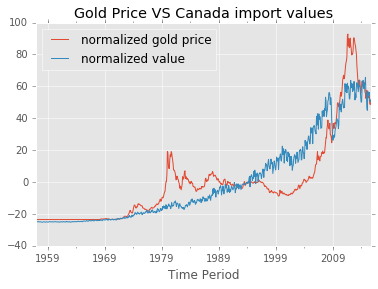

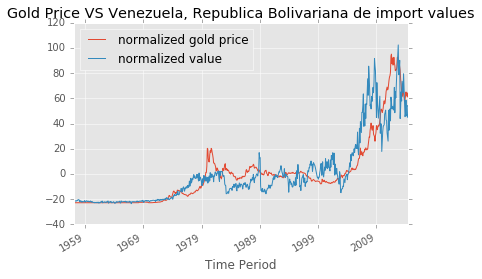

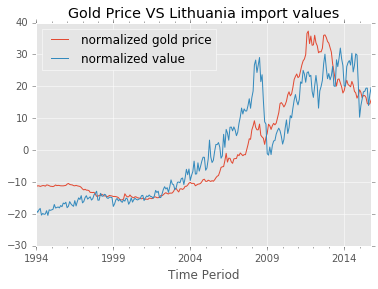

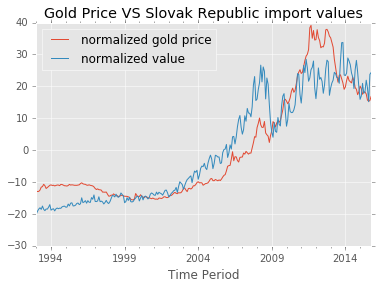

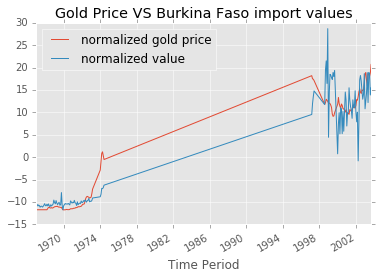

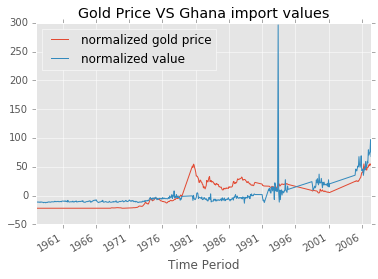

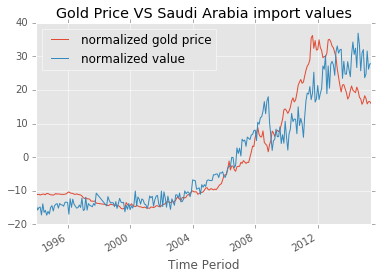

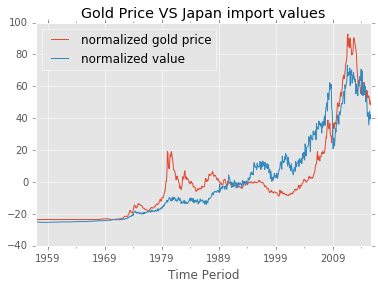

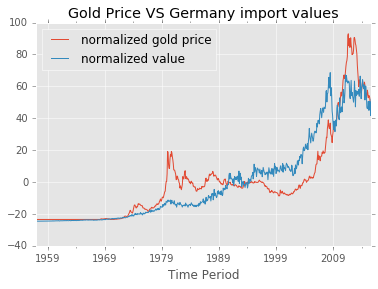

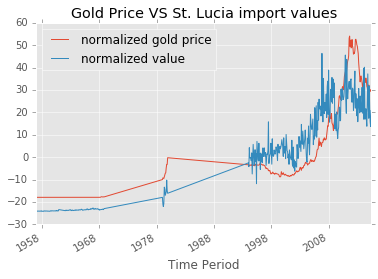

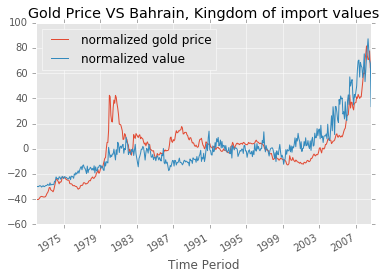

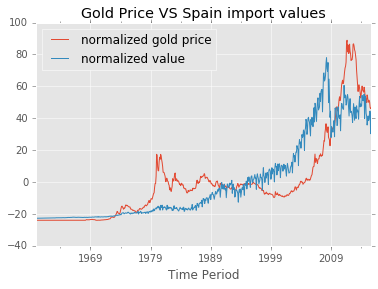

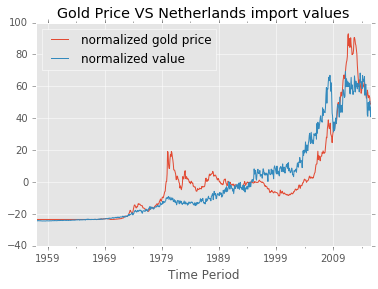

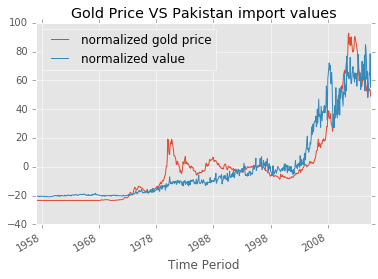

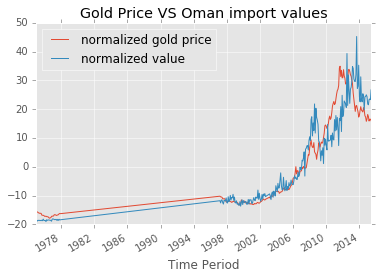

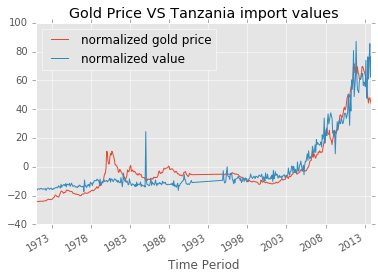

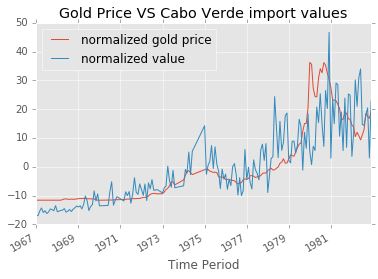

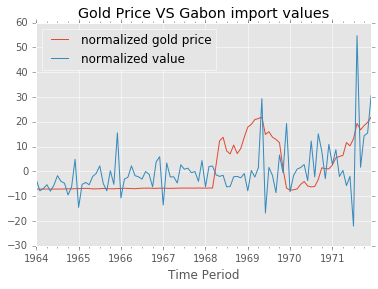

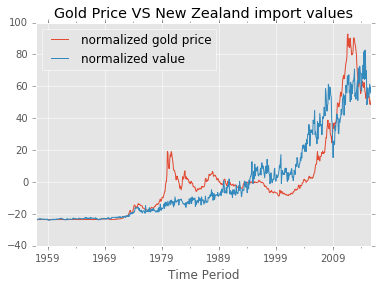

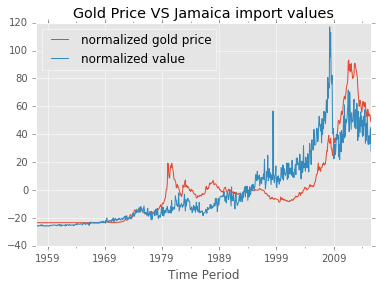

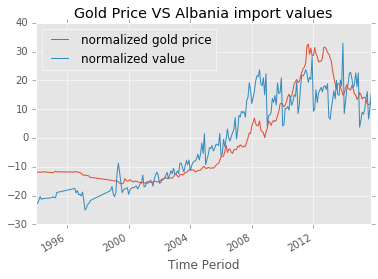

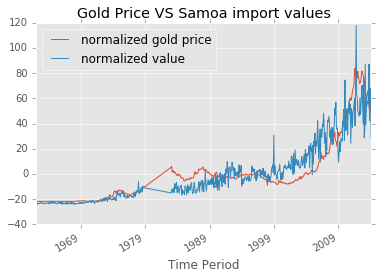

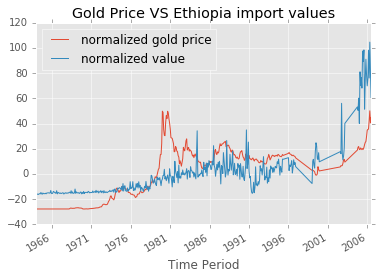

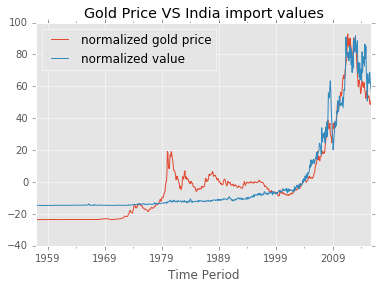

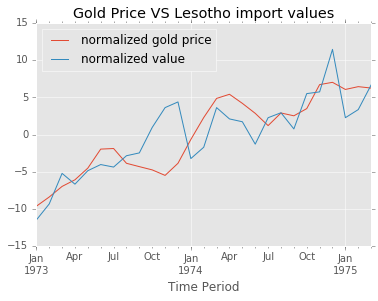

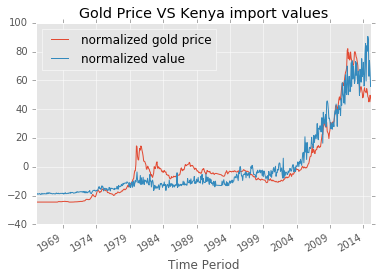

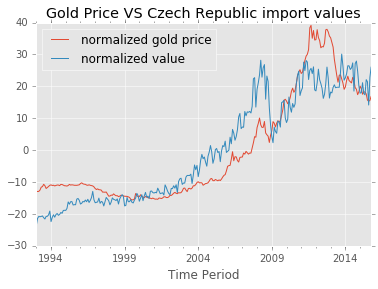

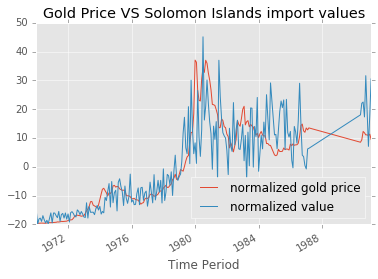

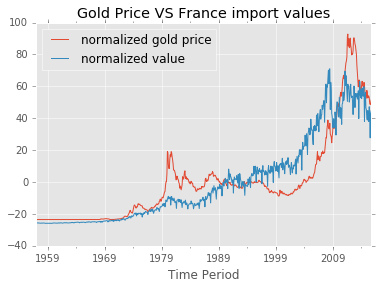

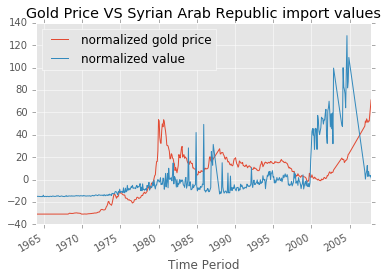

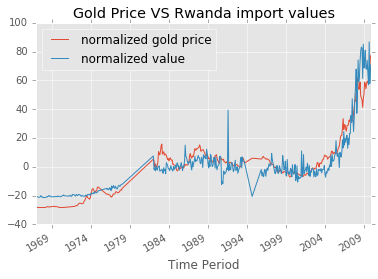

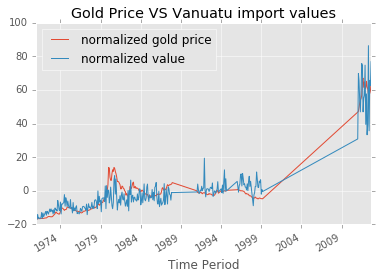

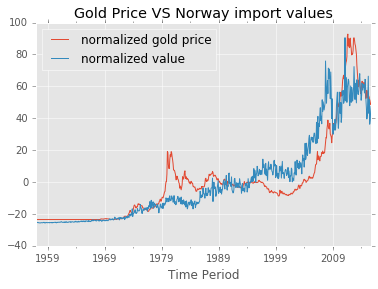

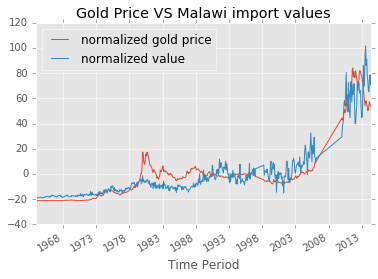

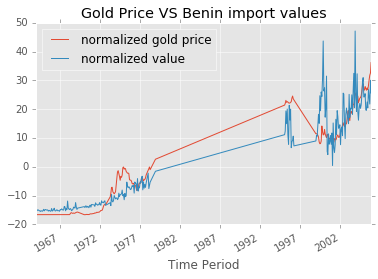

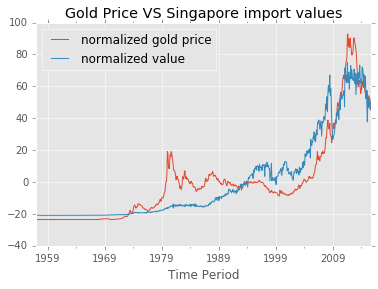

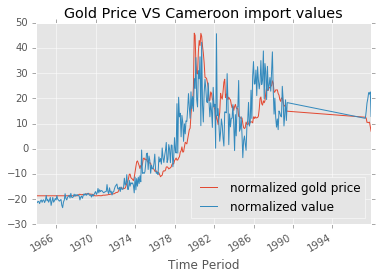

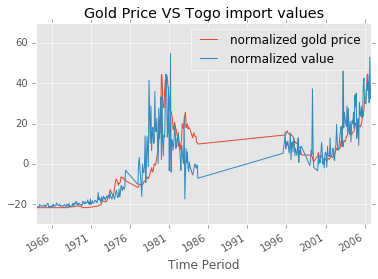

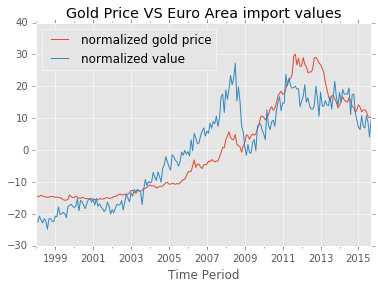

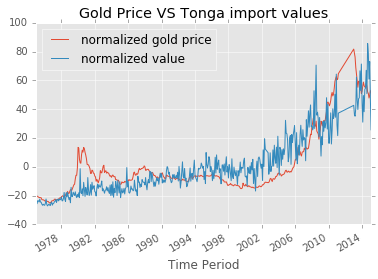

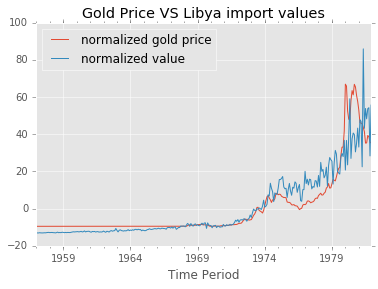

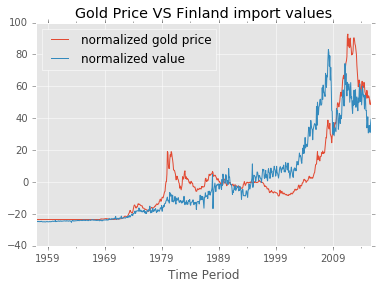

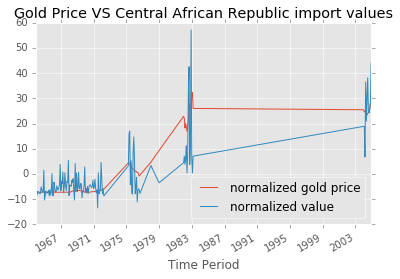

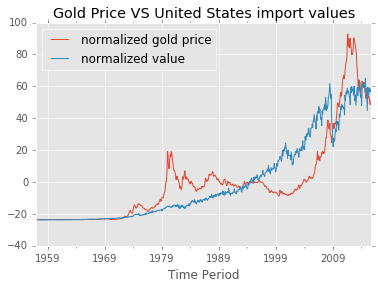

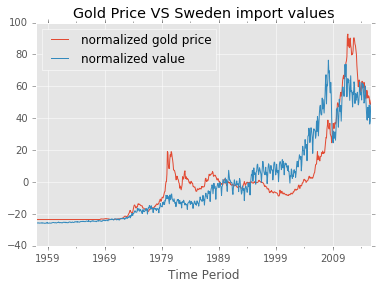

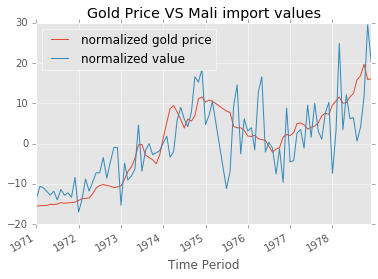

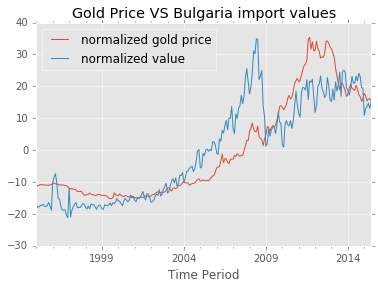

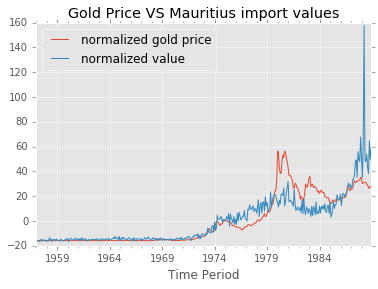

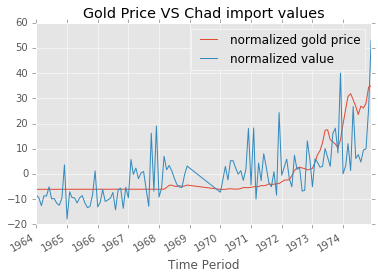

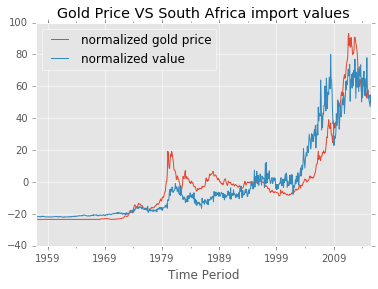

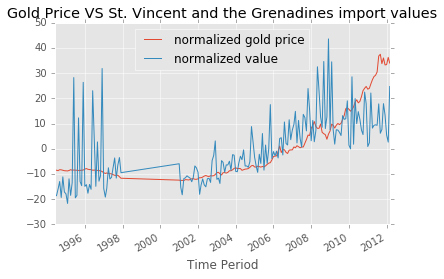

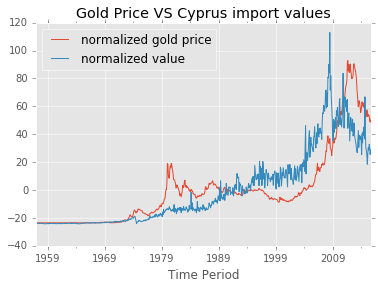

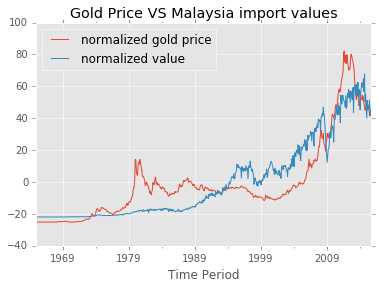

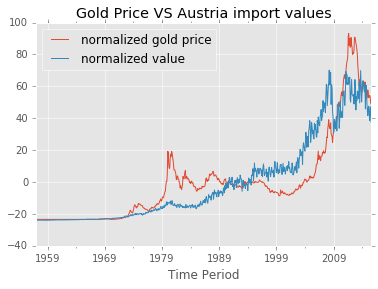

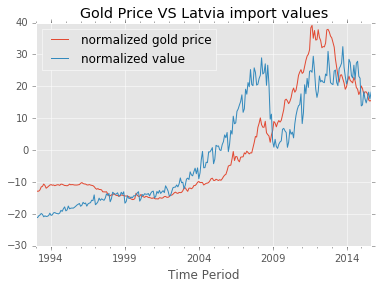

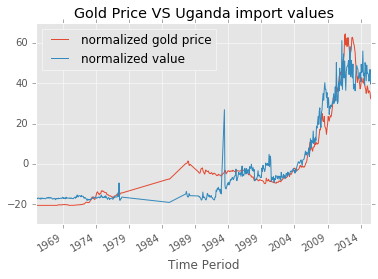

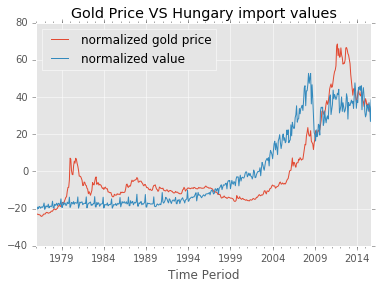

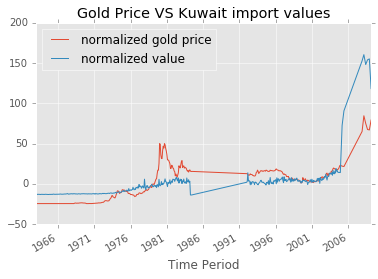

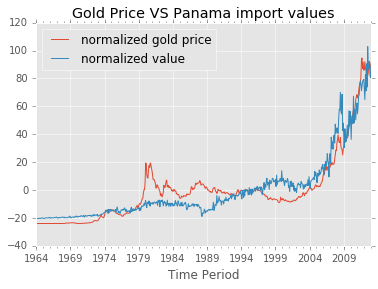

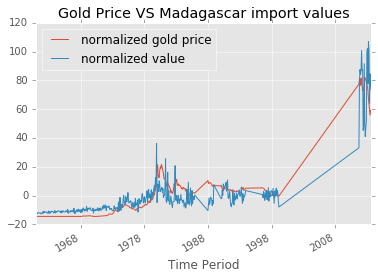

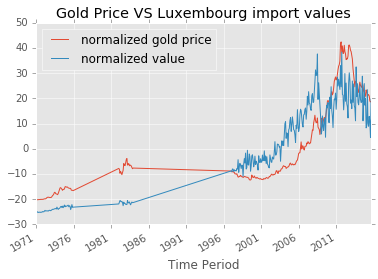

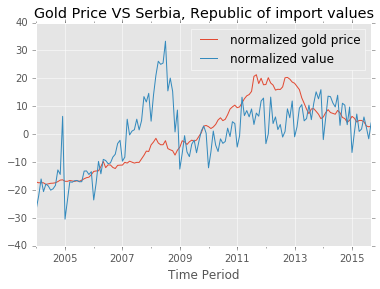

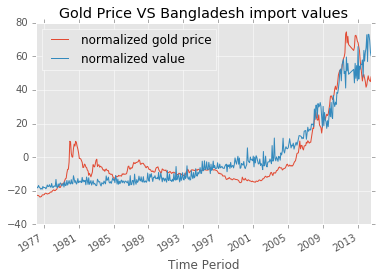

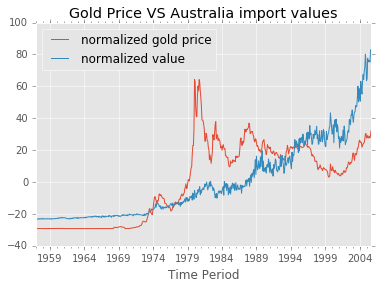

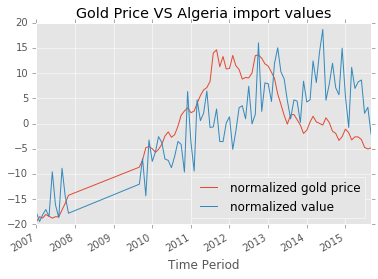

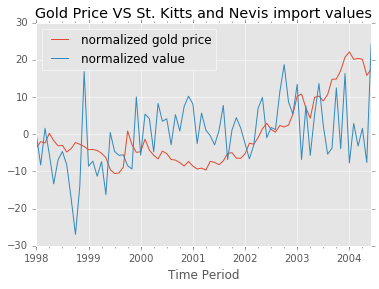

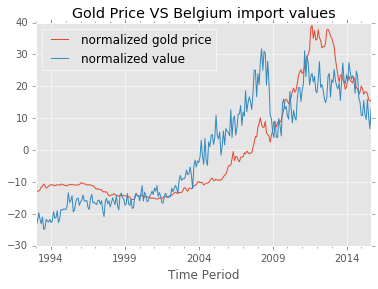

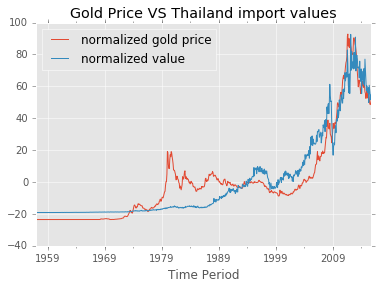

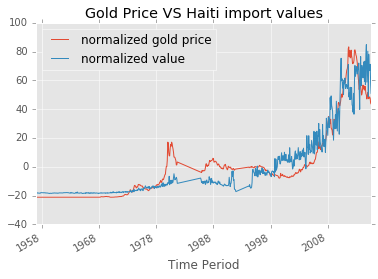

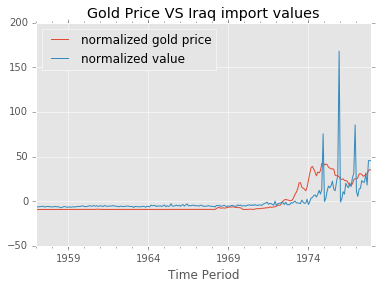

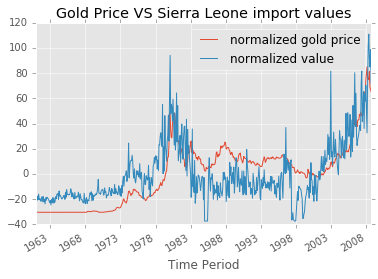

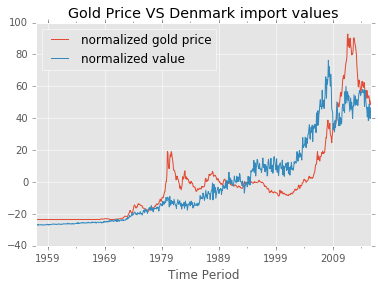

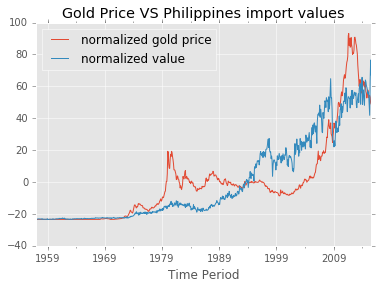

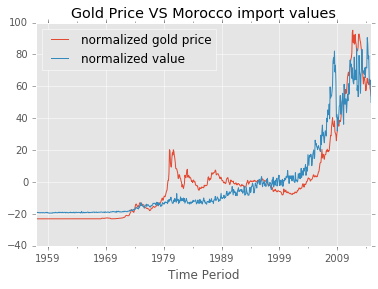

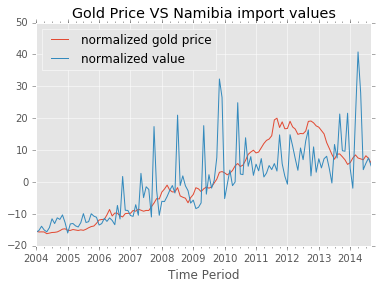

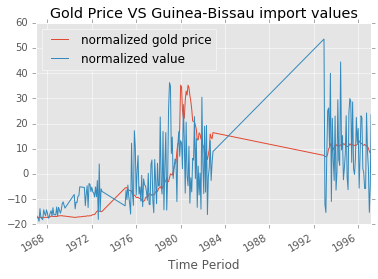

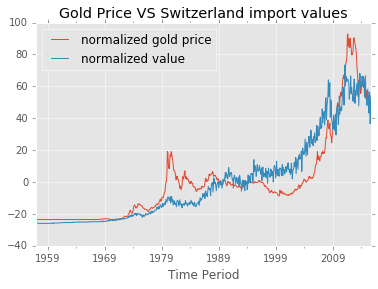

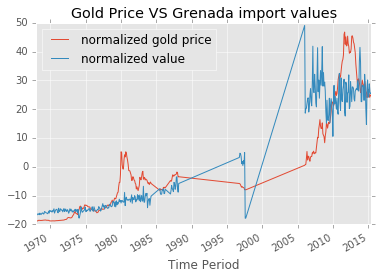

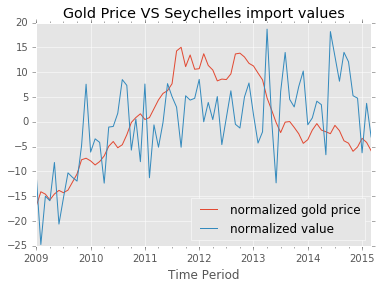

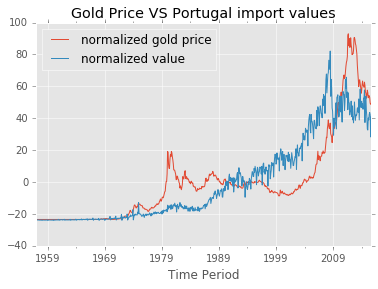

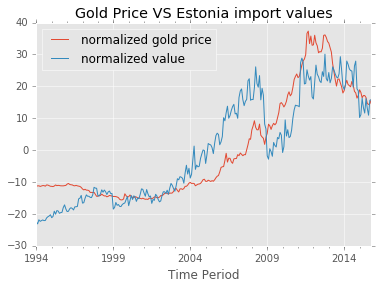

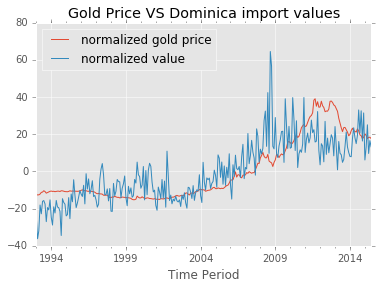

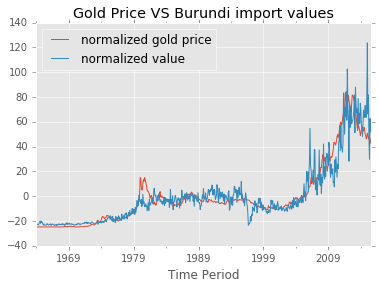

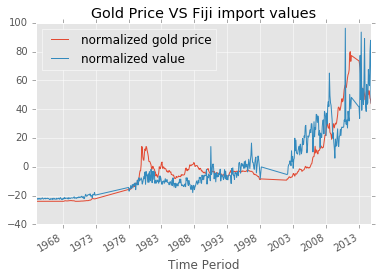

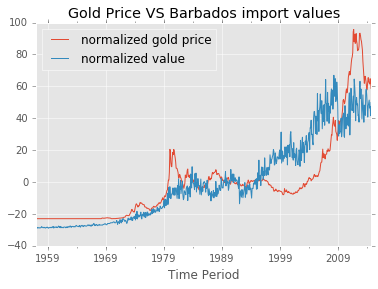

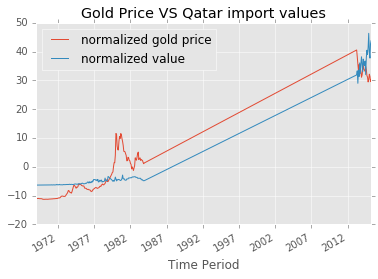

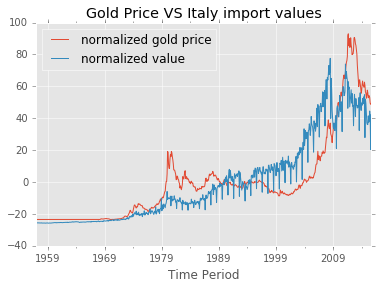

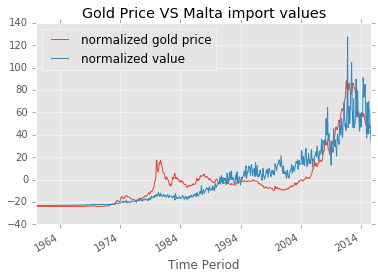

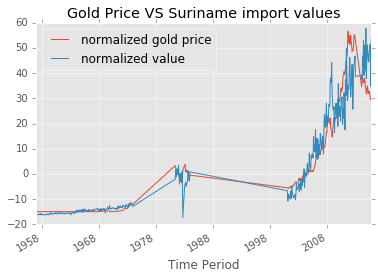

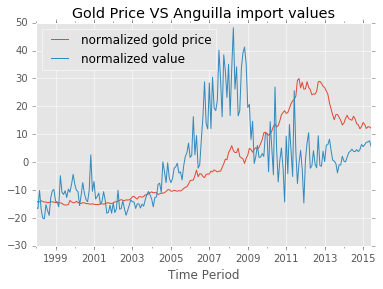

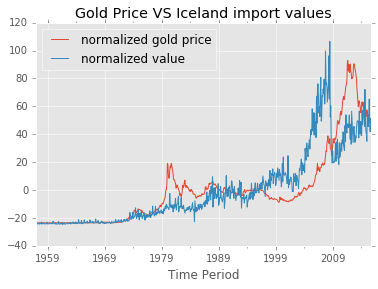

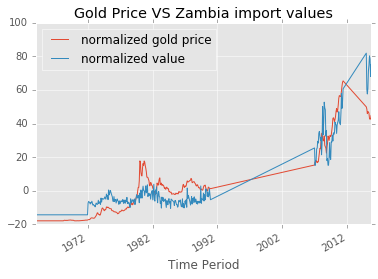

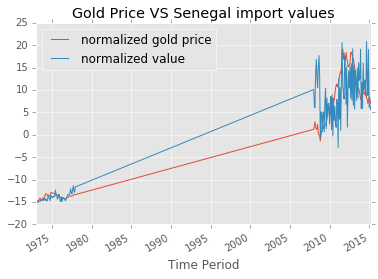

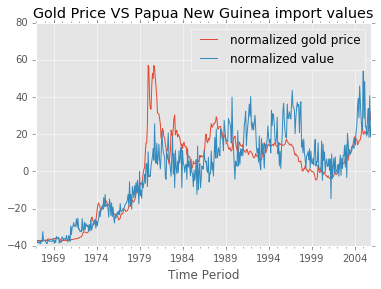

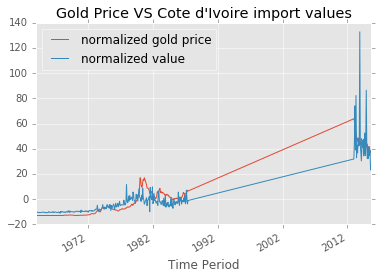

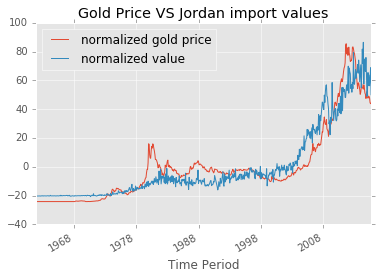

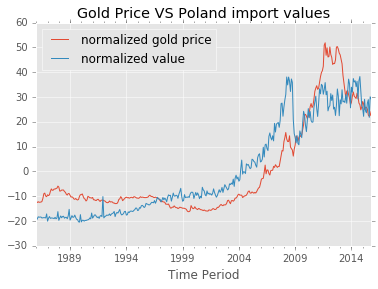

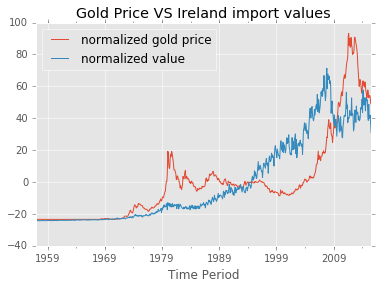

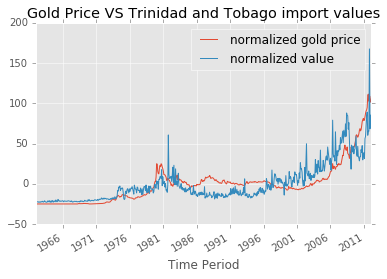

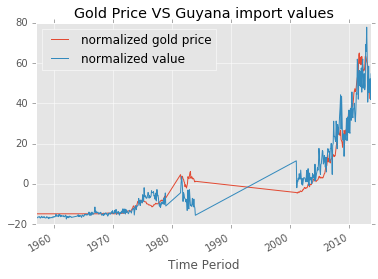

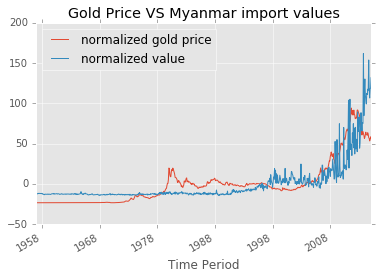

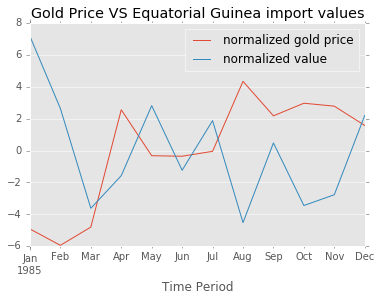

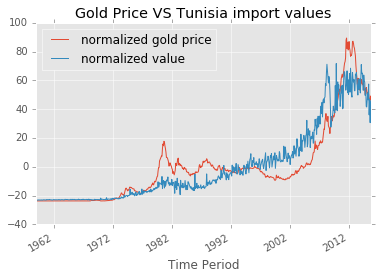

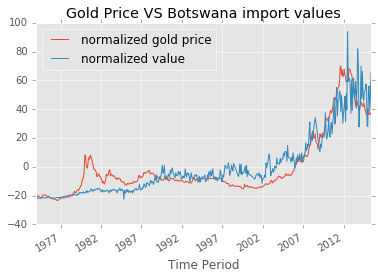

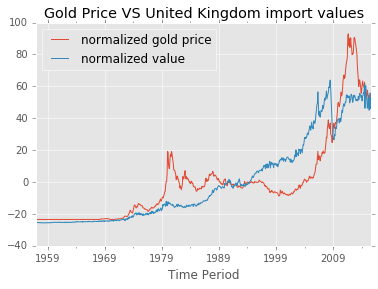

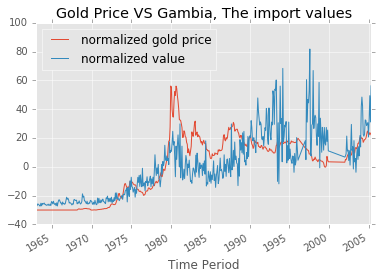

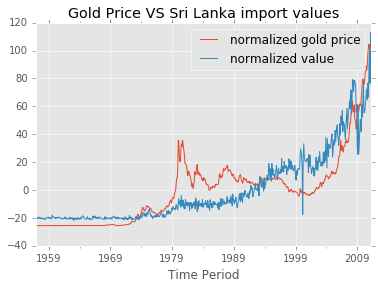

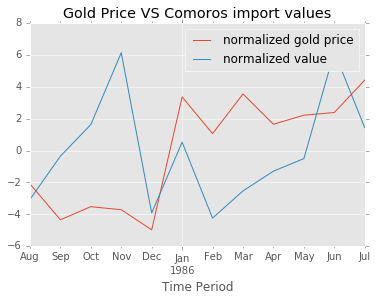

In [21]:
# plot time series vs gold price and import, export values
for i in range(N_import):
    plotTimeSeriesData(gold_country_import[i], True)

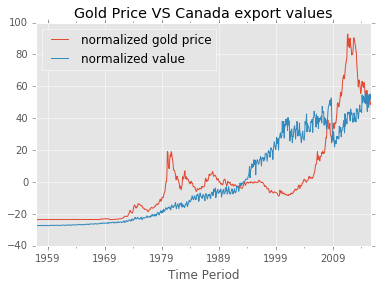

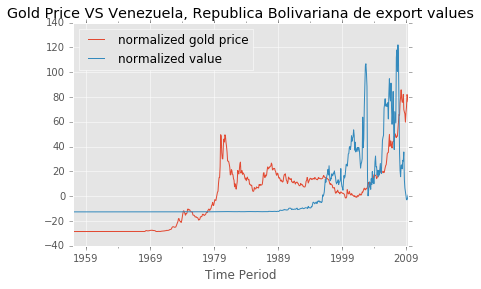

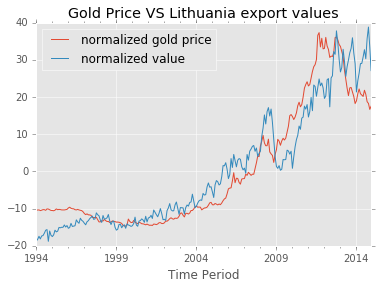

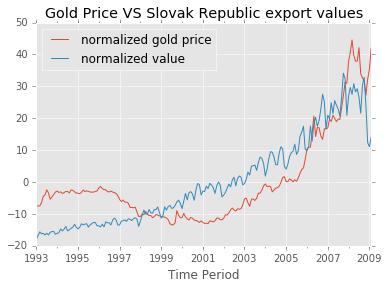

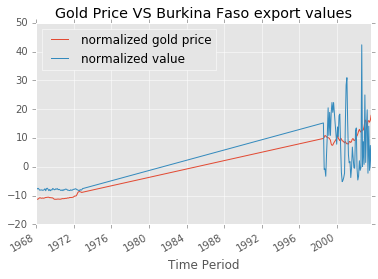

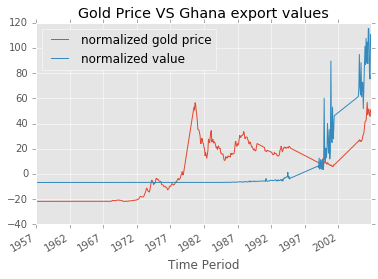

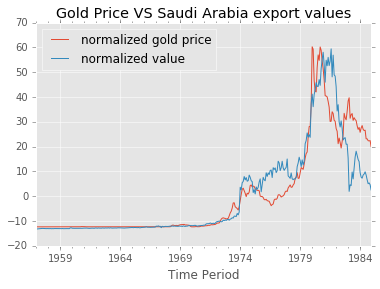

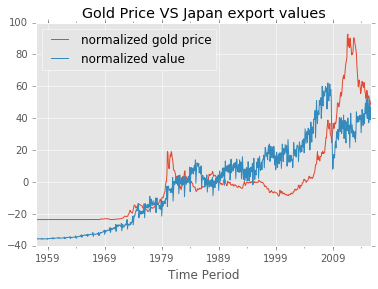

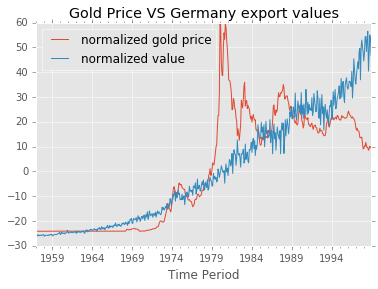

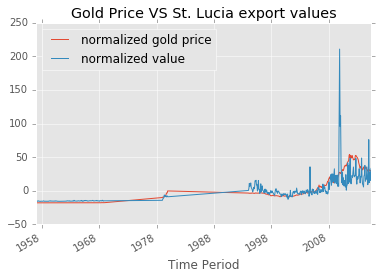

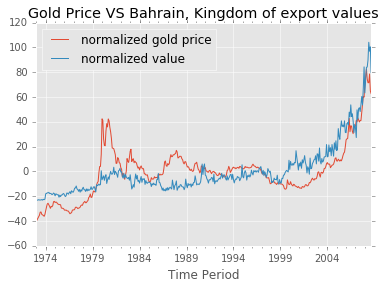

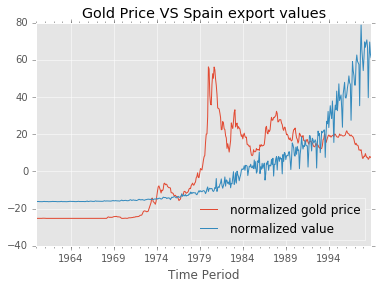

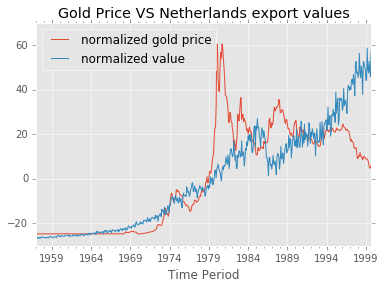

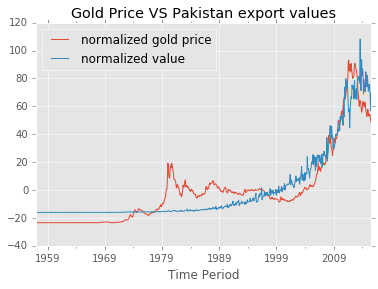

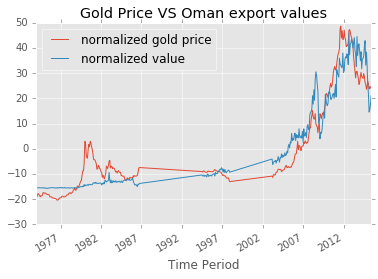

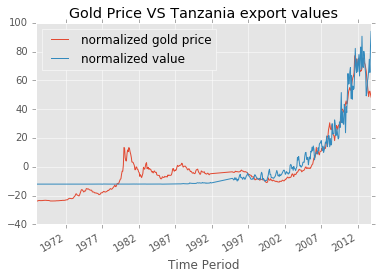

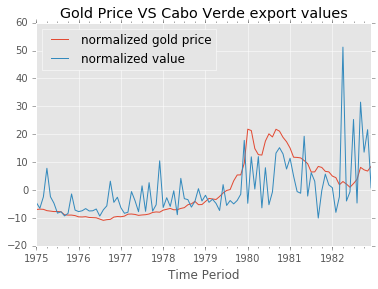

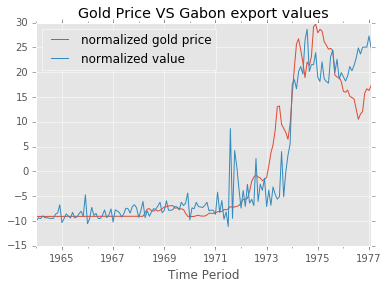

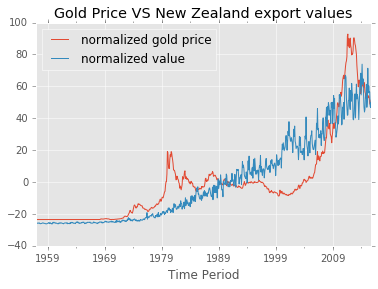

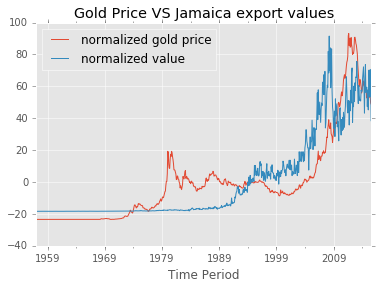

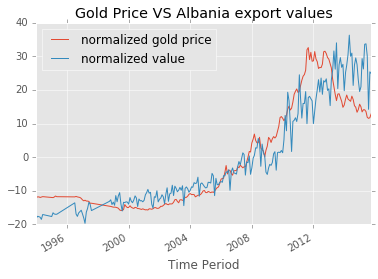

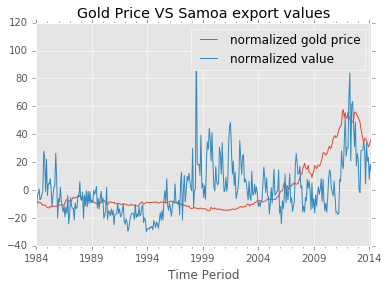

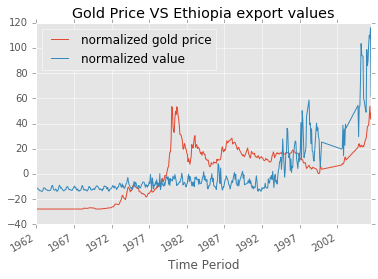

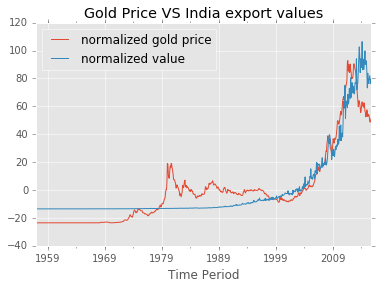

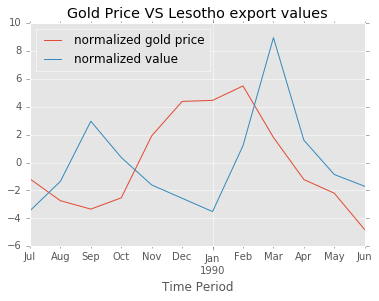

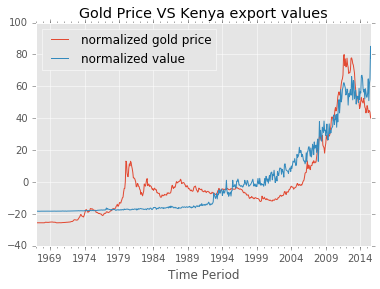

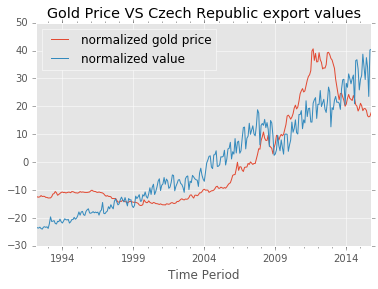

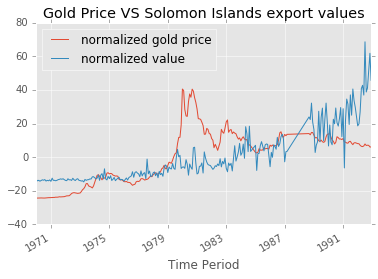

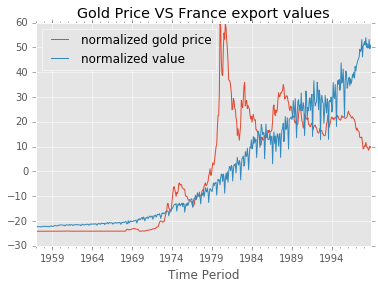

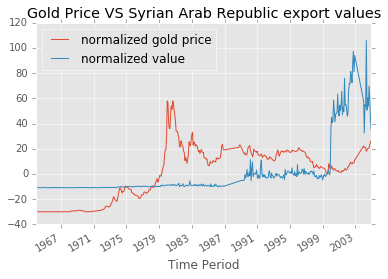

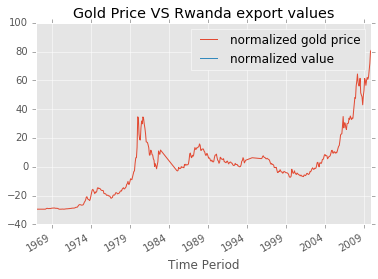

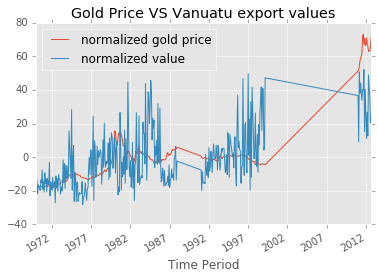

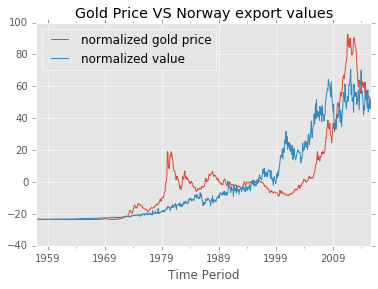

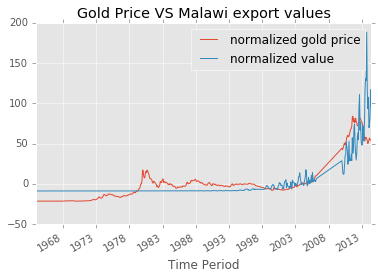

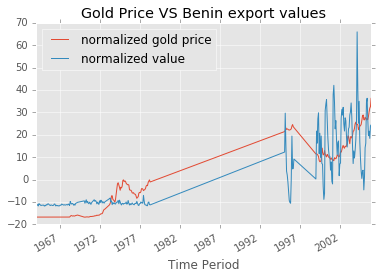

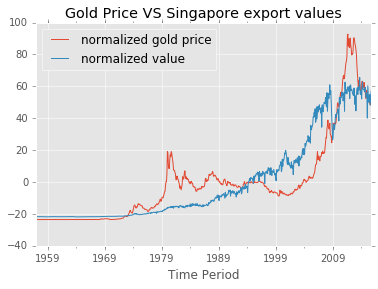

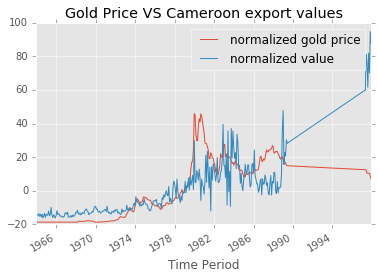

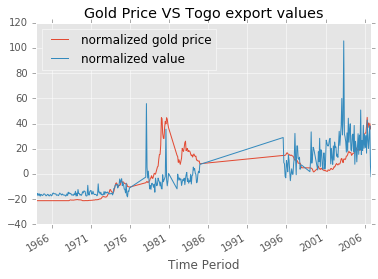

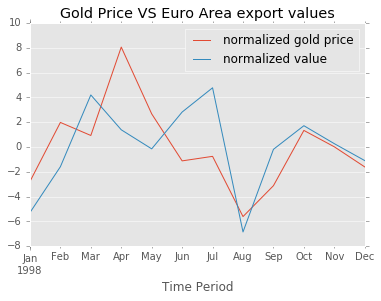

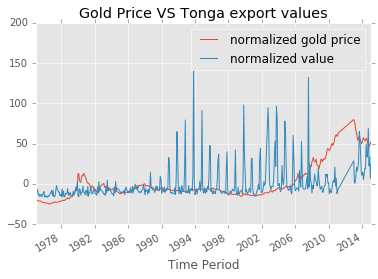

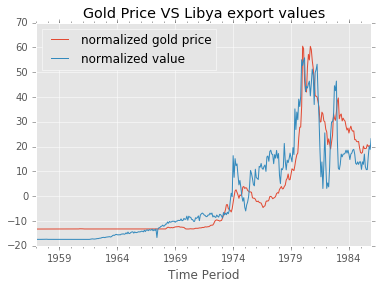

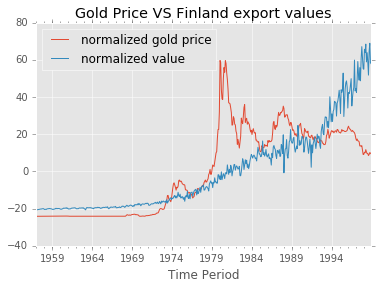

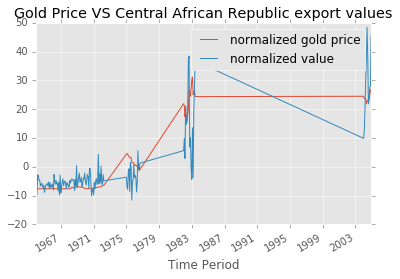

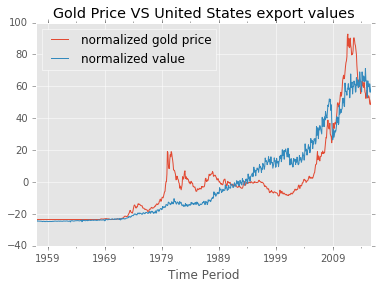

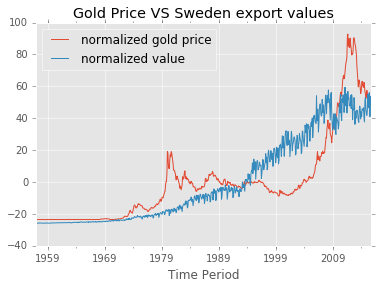

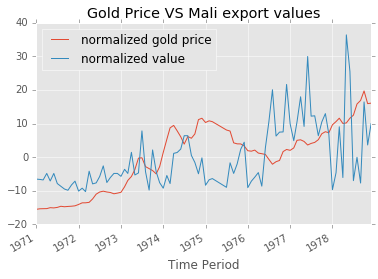

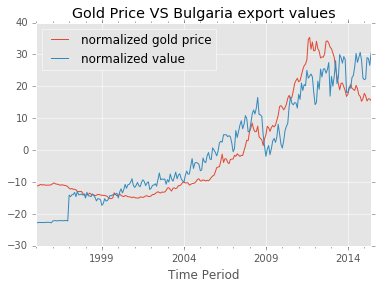

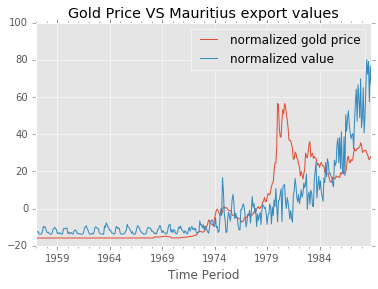

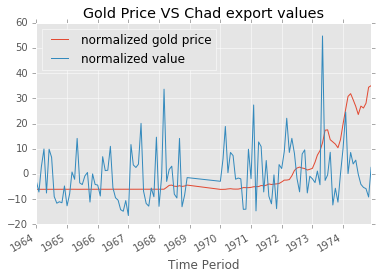

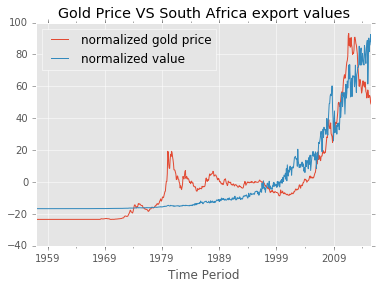

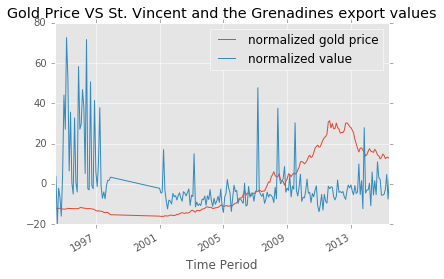

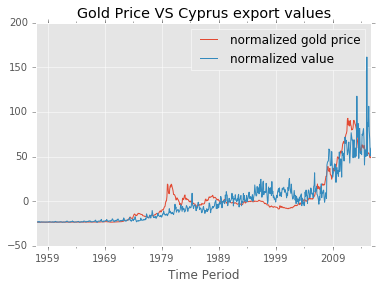

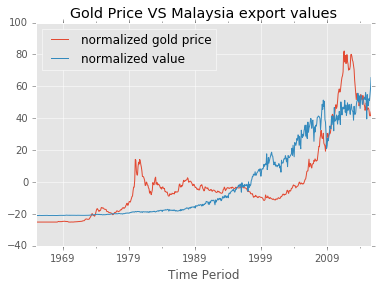

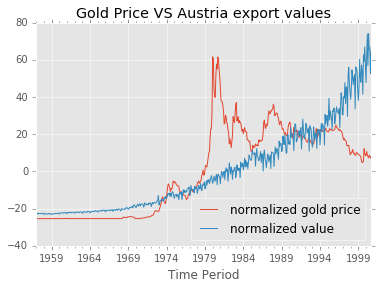

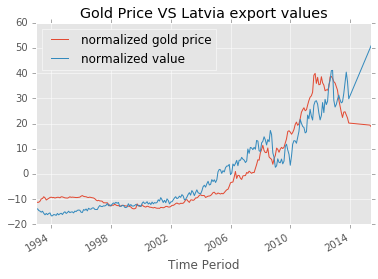

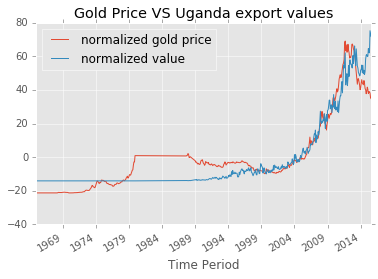

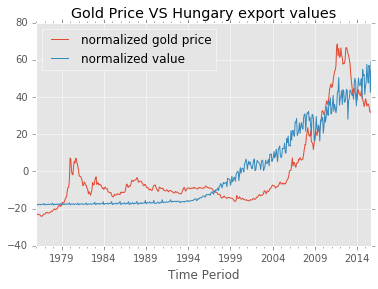

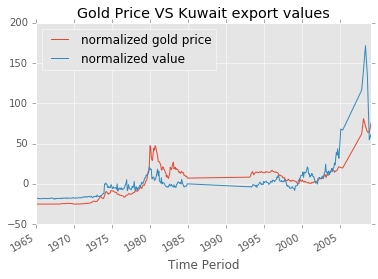

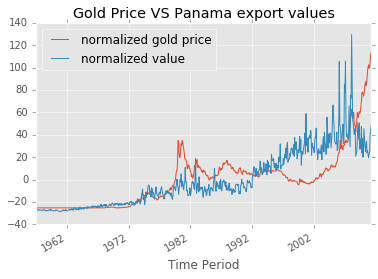

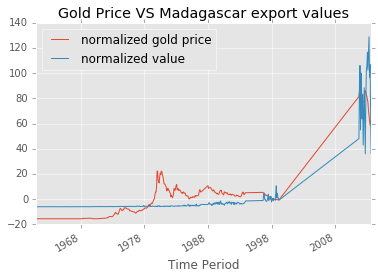

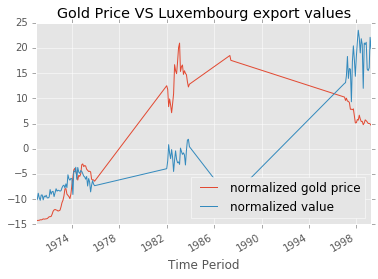

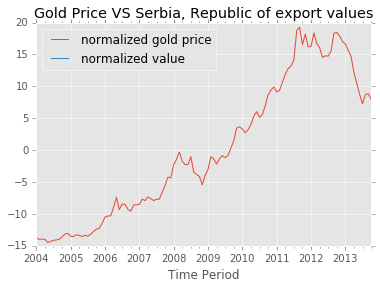

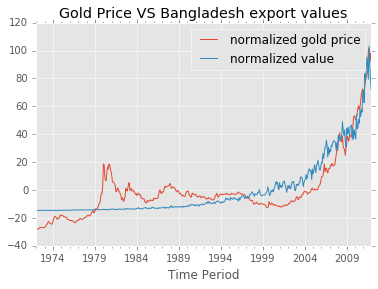

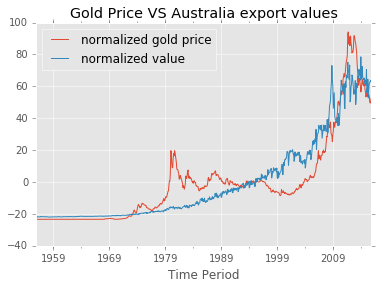

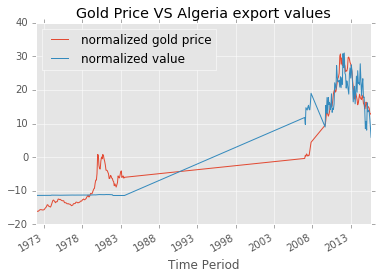

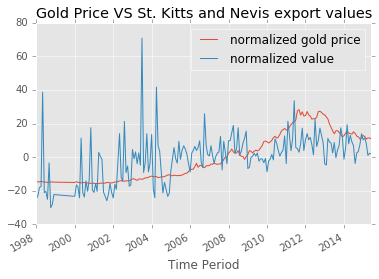

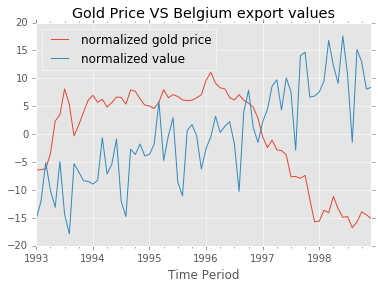

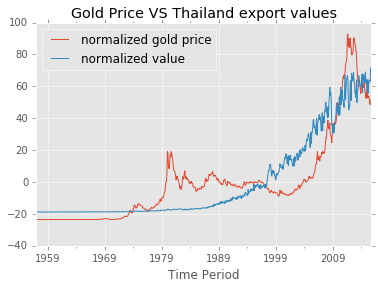

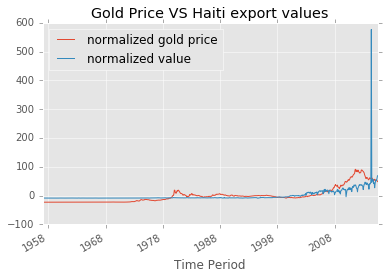

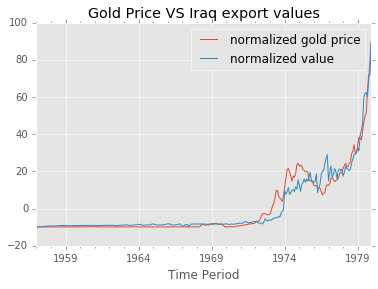

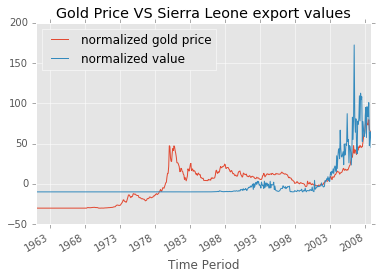

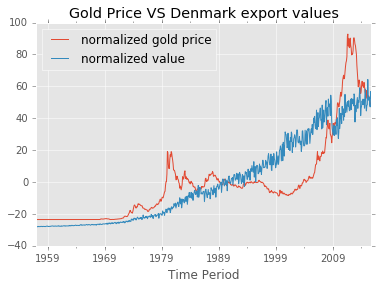

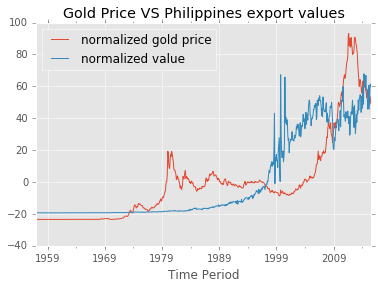

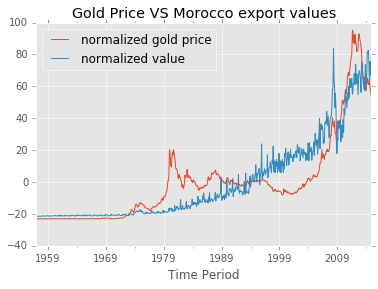

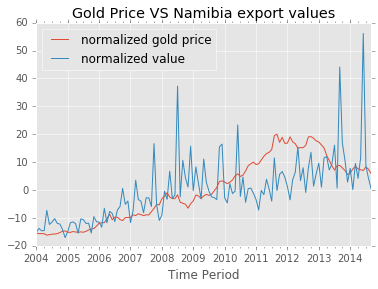

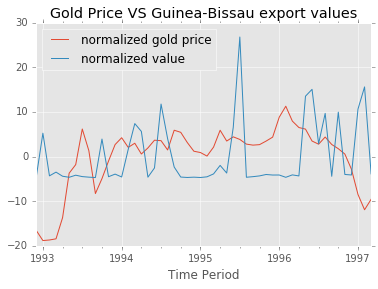

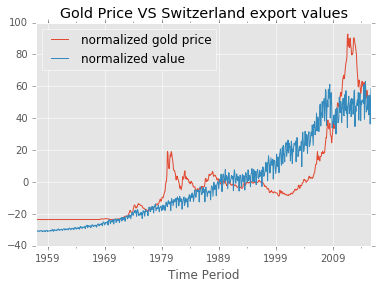

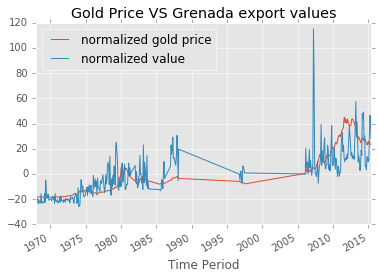

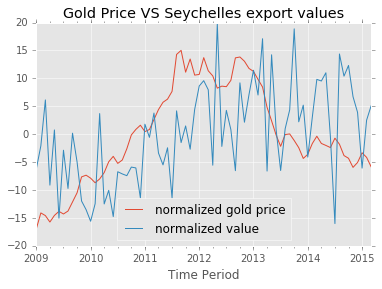

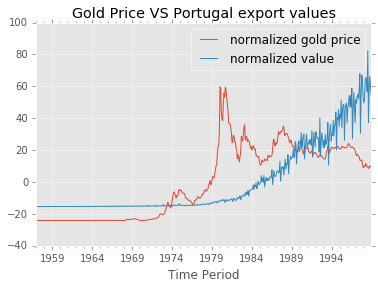

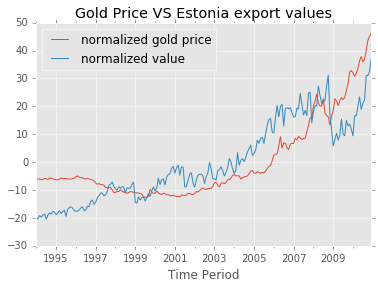

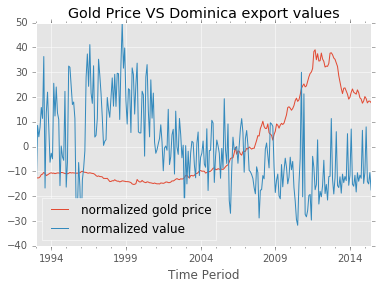

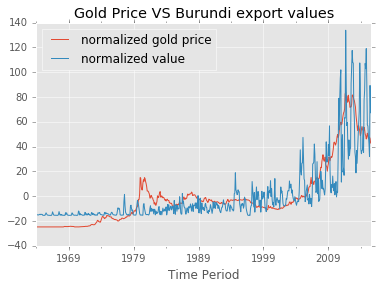

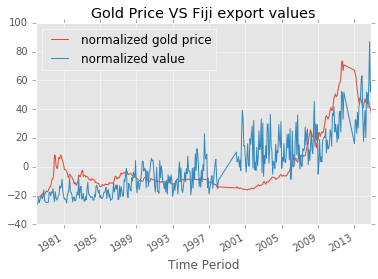

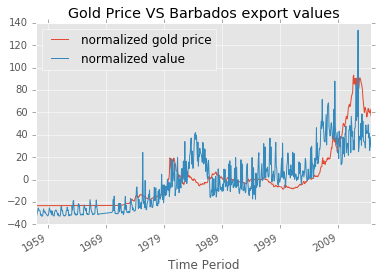

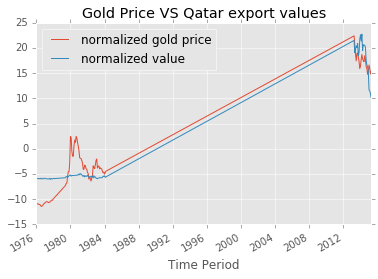

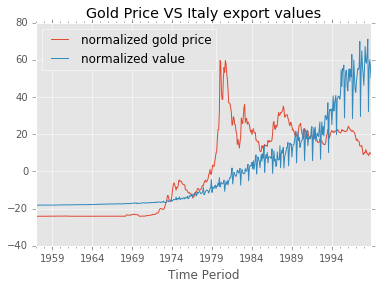

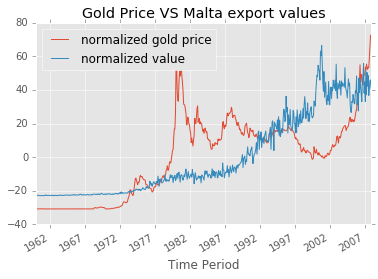

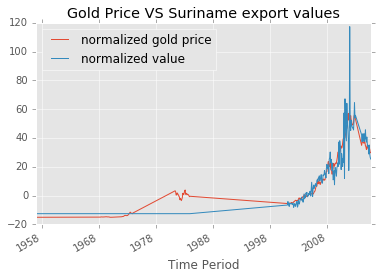

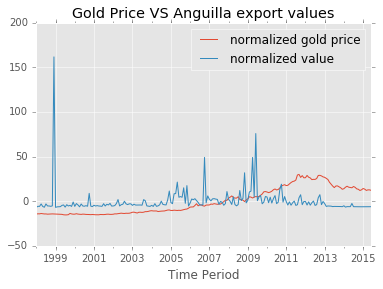

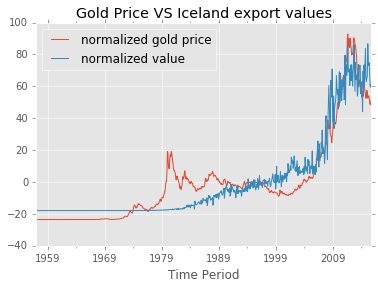

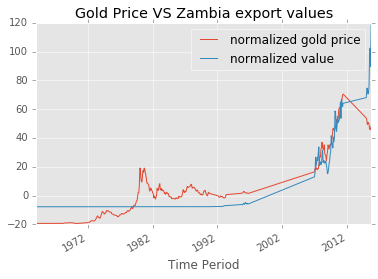

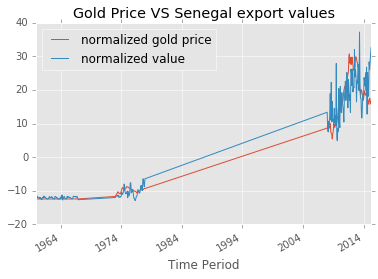

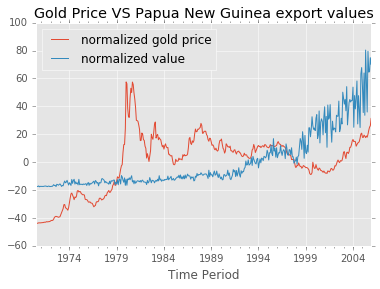

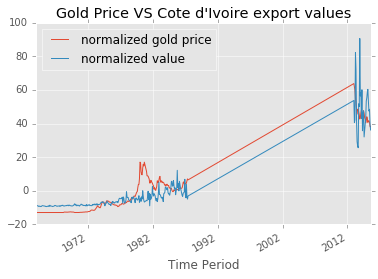

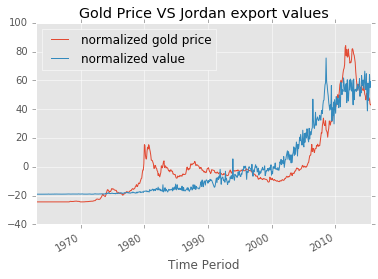

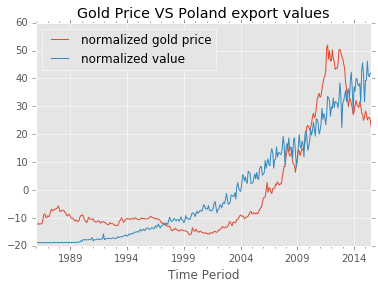

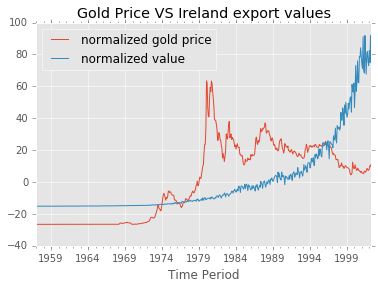

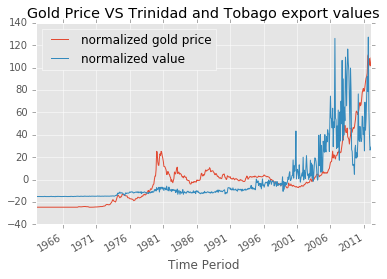

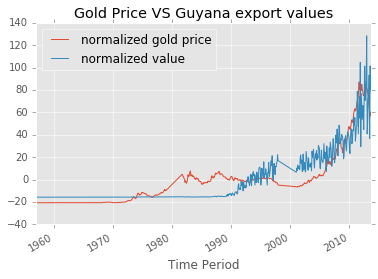

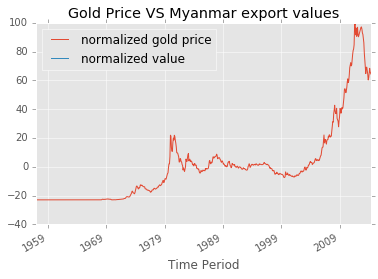

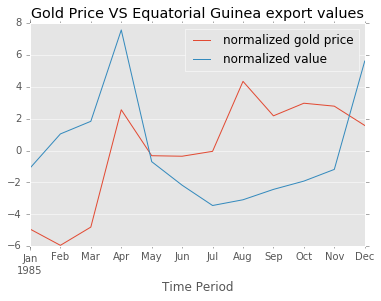

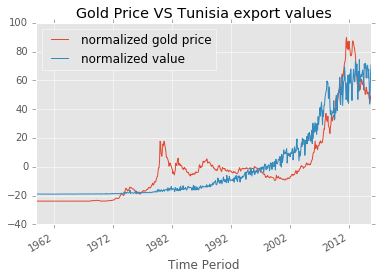

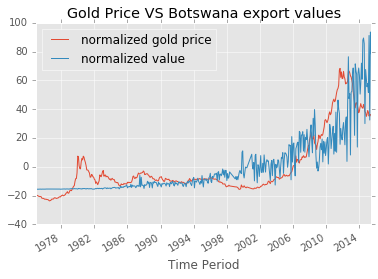

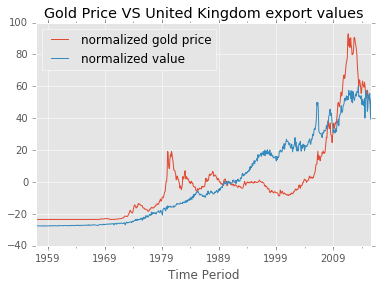

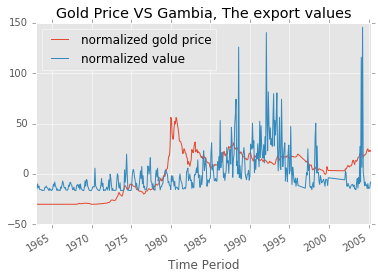

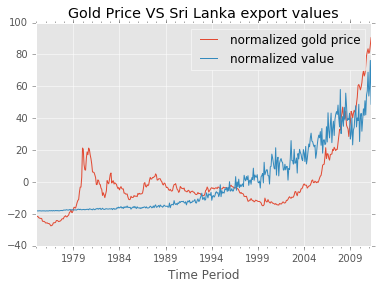

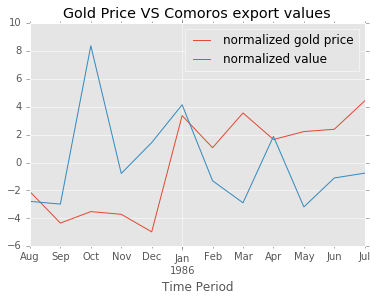

In [22]:
for i in range(N_export):
    plotTimeSeriesData(gold_country_export[i], False)

In [23]:
# Summarize the results
for i in range(N_import):
    summaryResult(gold_country_import[i])

Canada
                            OLS Regression Results                            
Dep. Variable:       normalized value   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2428.
Date:                Fri, 19 Feb 2016   Prob (F-statistic):          1.61e-230
Time:                        10:57:33   Log-Likelihood:                -2790.3
No. Observations:                 706   AIC:                             5583.
Df Residuals:                     705   BIC:                             5587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
normalized gold price  

/Users/xuez/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [24]:
# Summarize the results
for i in range(N_export):
    summaryResult(gold_country_export[i])

Canada
                            OLS Regression Results                            
Dep. Variable:       normalized value   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     947.9
Date:                Fri, 19 Feb 2016   Prob (F-statistic):          1.42e-132
Time:                        10:57:34   Log-Likelihood:                -3016.0
No. Observations:                 706   AIC:                             6034.
Df Residuals:                     705   BIC:                             6039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
normalized gold price  